In [44]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [45]:
import argparse

import numpy as np
import pandas as pd
import torch
from pytorch_lightning.loggers import TensorBoardLogger
import os

from tml.data.get_l1_l2 import (
    prepare_level1_training_set,
    prepare_level2_training_set,
    prune_test_set,
)
from tml.data.load_data import load_and_preprocess_data
from tml.models.model import BinaryClassificationLightning
from tml.plotting.plotting import tml_plots
from tml.training.trainer import train_model
from tml.utils.utils import load_config



In [3]:
config = load_config("../tml/configs/config.yaml")

In [49]:
# print("Calculate final results")
# y_pred_mean_1 = np.mean(out1[:, 1:], axis=1)
# y_pred_mvar = np.mean(out2_var[:, 1:], axis=1)
# final = np.column_stack((y_pred_mean_1, y_pred_mvar))


# # Plot and calculate thresholds
# os.makedirs(config['out_path'], exist_ok=True)

header = ['Mutation', 'Type', 'Probability_Score', 'Uncertainty_Score', 'Result']
result = pd.read_csv(f"../{config['out_path']}/{config['sample_name']}_scores.csv")
result_tf = pd.read_csv("../../../Moved_Data/Ehsan_Karimiara/DigiPico/results/DigiPico_scores.csv")

In [50]:
result.head()

,Mutation,Type,Probability_Score,Uncertainty_Score,Result
0,chr1:G>C,SNP-Hm,0.999937,0.014370,PASS
1,chr1:C>T,SNP-Ht-H,0.999849,0.014100,PASS
2,chr1:C>T,SNP-Ht-H,0.110560,0.031318,FAIL_LowScore
3,chr1:C>T,SNP-Ht,0.934866,0.022952,PASS
4,chr1:A>G,SNP-Ht-H,0.992331,0.015423,PASS


In [51]:
result_tf.head()

,Mutation,Type,Probability_Score,Uncertainty_Score,Result
0,chr1:G>C,SNP-Hm,0.999998,0.051595,PASS
1,chr1:C>T,SNP-Ht-H,1.000000,0.082044,PASS
2,chr1:C>T,SNP-Ht-H,0.022550,0.197507,FAIL_LowScore
3,chr1:C>T,SNP-Ht,0.981910,0.166912,FAIL_Uncertain
4,chr1:A>G,SNP-Ht-H,0.999745,0.091830,FAIL_Uncertain


In [52]:
final = np.column_stack((result['Probability_Score'].values, result['Uncertainty_Score'].values))
final_tf = np.column_stack((result_tf['Probability_Score'].values, result_tf['Uncertainty_Score'].values))

In [ ]:
cols = range(1, config['num_cols']+1)
config['input_dim'] = len(cols) - 1

# Load data and normalize
load_dict =load_and_preprocess_data(f"../{config['input_path']}", cols)

In [53]:
from tml.plotting.plotting import tml_plots

thr = tml_plots(final,
                load_dict['neg_ind'],
                load_dict['hpos_ind'],
                config['pscore_cf'],
                config['auc_cf'],
                config['tpr_cf'],
                "test"
                )

thr_tf = tml_plots(final_tf,
                   load_dict['neg_ind'],
                   load_dict['hpos_ind'],
                   config['pscore_cf'],
                   config['auc_cf'],
                   config['tpr_cf'],
                   "tf"
                  )


/fast/AG_Ohler/ekarimi/projects/tml/tml/plotting/plotting.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[:, 0].astype(float), shade=True, linewidth=3, clip=(0, 1), label=SNP)
/fast/AG_Ohler/ekarimi/projects/tml/tml/plotting/plotting.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[:, 0].astype(float), shade=True, linewidth=3, clip=(0, 1), label=SNP)
/fast/AG_Ohler/ekarimi/projects/tml/tml/plotting/plotting.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[:, 0].astype(float), shade=True, linewidth=3, clip=(0, 1), label=SNP)
/fast/AG_Ohler/ekarimi/projects/tml/tml/plotting/plotting.py:47:

In [ ]:
final = np.column_stack((final, np.repeat("PASS", len(y_pred_mvar))))
final[final[:,1].astype(float) > thr, 2] = "FAIL_Uncertain"
final[final[:,0].astype(float) <= config['pscore_cf'], 2] = "FAIL_LowScore"
save = np.column_stack((load_dict['names'], final))
# header = ['Mutation', 'Type', 'Probability_Score', 'Uncertainty_Score', 'Result']
# pd.DataFrame(save.astype(str)).to_csv(f"{config['out_path']}/{config['sample_name']}_scores.csv", header=header, index=None)


In [10]:
cols = range(1, config['num_cols']+1)
config['input_dim'] = len(cols) - 1

# Load data and normalize
load_dict =load_and_preprocess_data(f"../{config['input_path']}", cols)

Start Loading Data!
Loading Data Done!
Start Preparing Data!
Data Preparation Done!


In [11]:
load_dict.keys()

dict_keys(['all_set', 'test_ind', 'neg_ind', 'pos_ind', 'hpos_ind', 'names', 'out1', 'out2_var', 'test_set'])

In [16]:
np.unique(load_dict['all_set'][:, 0], return_counts=True)

(array([0., 1.]), array([   1634, 1783961]))

In [29]:
np.unique(load_dict['out2_var'], return_counts=True)

(array([0., 1.]), array([   1634, 1783961]))

In [31]:
load_dict['test_set'].shape

(866446, 42)

In [32]:
1783961/2

891980.5

In [54]:
import matplotlib.pyplot as plt

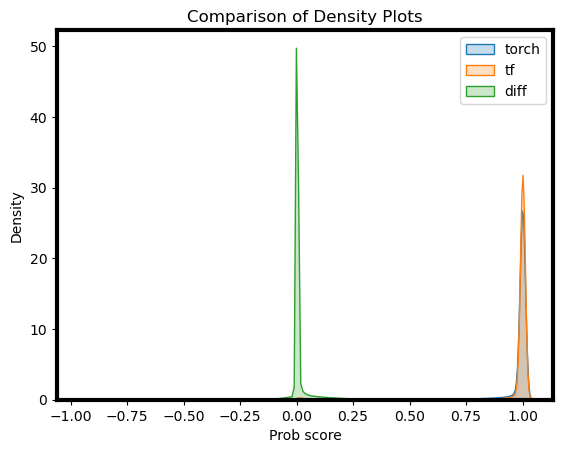

In [60]:
# plt.hist(result['Probability_Score'].values)
import seaborn as sns

# Assuming you have two datasets: data1 and data2
sns.kdeplot(data=result['Probability_Score'], fill=True, label="torch")
sns.kdeplot(data=result_tf['Probability_Score'], fill=True, label="tf")

sns.kdeplot(data=result_tf['Probability_Score']-result['Probability_Score'], fill=True, label="diff")

plt.legend()
plt.title("Comparison of Density Plots")
plt.xlabel("Prob score")
plt.ylabel("Density")
plt.show()

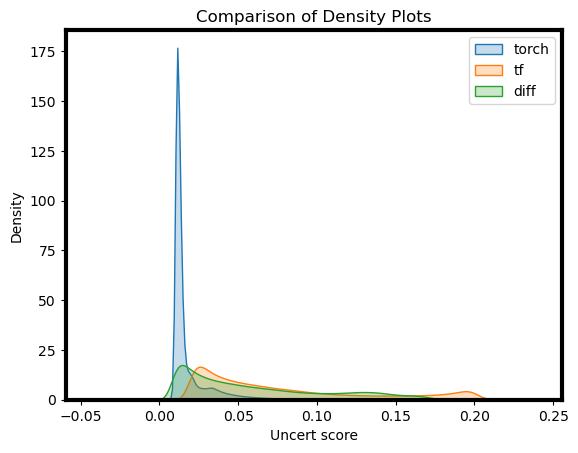

In [61]:
# plt.hist(result['Probability_Score'].values)
import seaborn as sns

# Assuming you have two datasets: data1 and data2
sns.kdeplot(data=result['Uncertainty_Score'], fill=True, label="torch")
sns.kdeplot(data=result_tf['Uncertainty_Score'], fill=True, label="tf")

sns.kdeplot(data=result_tf['Uncertainty_Score']-result['Uncertainty_Score'], fill=True, label="diff")

plt.legend()
plt.title("Comparison of Density Plots")
plt.xlabel("Uncert score")
plt.ylabel("Density")
plt.show()